In [2]:
#importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, gmaps, os, re, datetime



In [3]:
#Loading Cleaned CSV
cleaned_wine = "../Output/wine_cleaned.csv"
wine_df = pd.read_csv(cleaned_wine)

wine_df.head()

,country,description,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,Wine_Year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [4]:
wine_df.count()

country                  129908
description              129908
points                   129908
price                    120916
province                 129908
region_1                 108724
taster_name              103664
taster_twitter_handle     98695
title                    129908
variety                  129907
winery                   129908
Wine_Year                129908
dtype: int64

In [5]:
#Droping rows with no reviewer for Bias Comparison
wine_df = wine_df.dropna(subset=['taster_name'])
wine_df.head()


,country,description,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,Wine_Year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


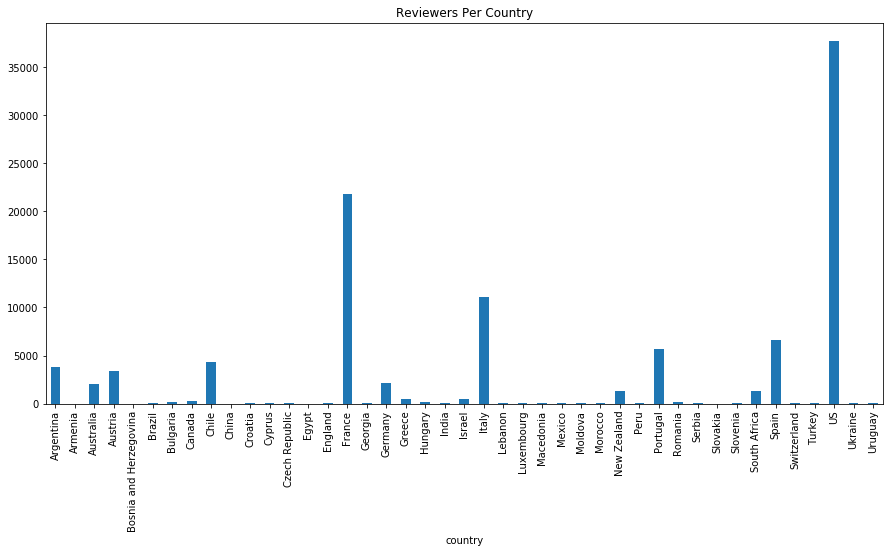

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
wine_df.groupby('country').count()['taster_name'].plot.bar(ax=ax,y="Number of reviewers", title="Reviewers Per Country")

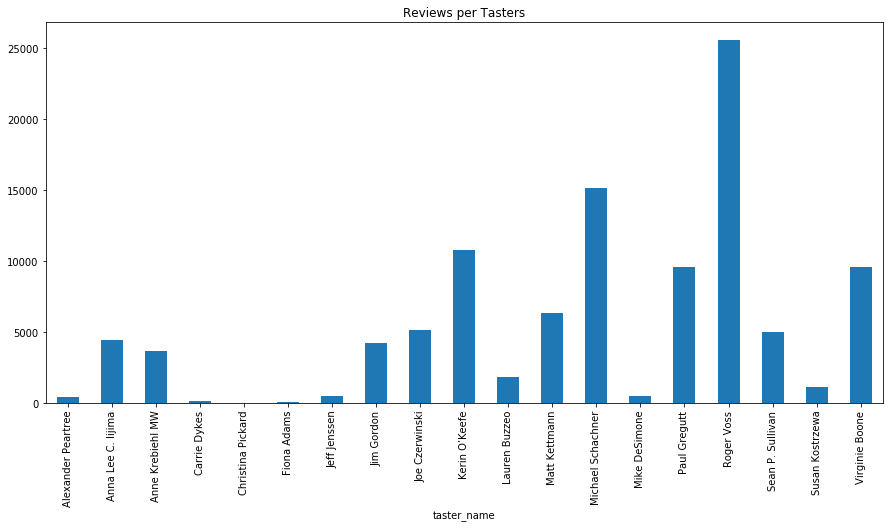

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
wine_df.groupby('taster_name').count()['country'].plot.bar(ax=ax, title="Reviews per Tasters")